In [2]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/34/7d/b1dedde8af99bd82f20ed7e9697aac0597de3049b1f786aa2aac3b9bd4da/Keras-2.2.2-py2.py3-none-any.whl


In [1]:
import keras
print(keras.__version__)

C:\Users\Nacho\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.2.2


from keras.datasets import mnist

In [2]:
from keras.datasets import mnist

In [3]:
from keras import models, layers

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
model = models.Sequential() #create model for the multiple layers

In [1]:
#FIRST LAYER
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(512,#output nodes
                       activation='relu',#activation function,, try to always use this function
                       input_shape = (28 * 28,)#input nodes, pixel size, 2D. we will end up with a 1D pdf [0,0,...,1,0]
))


#SUBSEQUENT LAYERS(COPY PASTE THIS PIECE OF CODE). IF IT'S THE FINAL LAYER, SELECT ACTIVATION = SOFTMAX. IF ITS AN INTERMEDIATE LAYER, SELECT RELU
model.add(layers.Dense(10,activation='softmax')) #output nodes= 10 because it is a pdf for 10 numbers,, softmax for the output layer
#INFO ON THE MODEL
model.summary()

model.compile(#NEURAL NETWORK NEEDS TO BE COMPILED
    optimizer = 'rmsprop', #GOOD OPTIMIZER FOR STARTING. NNs START WITH BIG STEPS AND REDUCE STEP SIZE
    loss='categorical_crossentropy', metrics = ['accuracy']#HOW FAR IS THE TRUE RESULT FROM THE PREDICTED RESULT. DISTANCES BETWEEN PROBABILITY DISTRIBUTION
)

C:\Users\Nacho\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Train:  (60000, 28, 28)
Test:  (10000, 28, 28)


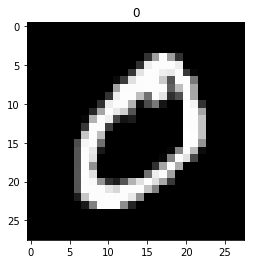

Before: 5
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Train: ', train_images.shape)
print('Test: ', test_images.shape)

#print(train_images[1])

plt.imshow(train_images[1],cmap='gray')
plt.title(str(train_labels[1]))
plt.show()

train_images = train_images.reshape((60000, 28*28))#proper shape
train_images = train_images.astype('float32')/255.0#normalization

test_images = test_images.reshape((10000, 28*28))#proper shape
test_images = test_images.astype('float32')/255.0#normalization

from keras.utils import to_categorical

print('Before:', train_labels[0])
train_labels = to_categorical(train_labels)#category = probability 
test_labels = to_categorical(test_labels)
print('After:', train_labels[0])

In [72]:
model.evaluate(train_images, train_labels)#IT DOES NOTHING BEFORE TRAINING!!!! this function gives a loss (first number) and an accuracy (second number). 

60000/60000 [==============================] - 5s 81us/step


[2.3456621190388995, 0.1068]

In [84]:
import numpy as np
print(model.predict(train_images[0:1]))
print(np.max(model.predict(train_images[0:1]))) #predicts output with one cycle
print(np.argmax(model.predict(train_images[0:1])))
print(train_labels[0])

[[0.10367085 0.1098059  0.09893595 0.07899011 0.08957787 0.06773078
  0.12288912 0.07011909 0.15903361 0.09924669]]
0.15903361
8
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [87]:
history = model.fit(train_images, train_labels, #NOW WE TRAIN THE NEURAL NETWORK
          epochs = 5, #number of iterations
          batch_size = 128)#divide the data in batches to paralellize and reduce time

Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0288 - acc: 0.9912
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0213 - acc: 0.9940
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0175 - acc: 0.9950
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0132 - acc: 0.9959
Epoch 5/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0100 - acc: 0.9973


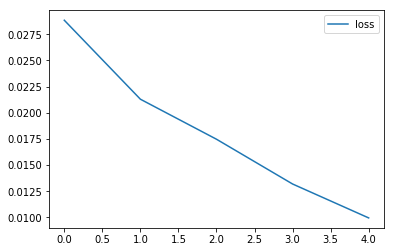

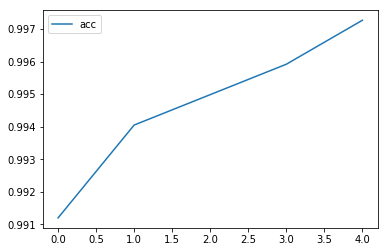

In [97]:
#(history.history)
plt.plot(history.history['loss'],label = 'loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history['acc'], label = 'acc')
plt.legend()
plt.show()
plt.close()

In [86]:
test_loss, test_acc = model.evaluate(train_images, train_labels)#TEST THE NEURAL NETWORK
print(test_loss, test_acc)

60000/60000 [==============================] - 3s 55us/step
0.025014872842864133 0.9927
